# Nick Chen

# Milestone 2

## Research question/interests

I intend to investigate the demand of global fish and seafood production via wild capturing and the affect it had on climate change by looking at how it affects the sustainable fish stocks. Does the wild fish stock will ever fulfilled the increasing demand resulted by the evergrowing global population? What will be the prediction of the wild fish stock if overfishing still exists for the next decade?

I also want to shift our perspective by looking at how technologies like aquaculture and seafood farming will help alleviate the impact of overfishing. Comparing country and region in terms of the extent of overfishing and their levels of overexploited fisheries to analyze and their production trend.

More specifically, the main focus on my research will be on:

**How widely adopted aquaculture farming are globally?**

**Does aquaculture has reduced the serverity of overfishing?**

**Does the adoption of aquaculture lowers the overexploited fish stock globally?**

In [1]:
import numpy as np
import pandas as pd

aquaculture = pd.read_csv("../data/raw/aquaculture-farmed-fish-production.csv", sep=",")
capturedVsAquaculture= pd.read_csv("../data/raw/capture-fisheries-vs-aquaculture.csv", sep=",")
captured = pd.read_csv("../data/raw/capture-fishery-production.csv", sep=",")
seafoodConsumptionpercapita = pd.read_csv("../data/raw/fish-and-seafood-consumption-per-capita.csv", sep=",")
sustainableFishStocks = pd.read_csv("../data/raw/fish-stocks-within-sustainable-levels.csv", sep=",")
globalFisheryBySector = pd.read_csv("../data/raw/global-fishery-catch-by-sector.csv", sep=",")
seafoodProduction = pd.read_csv("../data/raw/seafood-and-fish-production-thousand-tonnes.csv", sep=",")

# To confirm data were actually imported:
captured.head()

,Entity,Code,Year,Capture fisheries production (metric tons)
0,Afghanistan,AFG,1960,200.0
1,Afghanistan,AFG,1961,300.0
2,Afghanistan,AFG,1962,300.0
3,Afghanistan,AFG,1963,300.0
4,Afghanistan,AFG,1964,300.0


# MileStone 3

## Task 1: Exploratory Data Analysis

Importing all essential libraies

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings

### Preliminary Data Processing


In [3]:
# Read combined file
df = file = ('../data/processed/combined_nick.csv')
df = pd.read_csv(file, sep=',')

First, we can check to shape of the dataframe in terms of rows and columns to get a general picture of the dataset structure

In [4]:
df.shape 

(16724, 20)

We can also get a preview of the data using __.head()__

In [5]:
df

,Entity,Code,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)","Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited,Artisanal (small-scale commercial),Discards,Industrial (large-scale commercial),Recreational,Subsistence,Commodity Balances - Livestock and Fish Primary Equivalent - Pelagic Fish - 2763 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Crustaceans - 2765 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Cephalopods - 2766 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Demersal Fish - 2762 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Freshwater Fish - 2761 - Production - 5510 - tonnes,"Commodity Balances - Livestock and Fish Primary Equivalent - Molluscs, Other - 2767 - Production - 5510 - tonnes","Commodity Balances - Livestock and Fish Primary Equivalent - Marine Fish, Other - 2764 - Production - 5510 - tonnes"
0,Afghanistan,AFG,1969,60.0,400.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460.0,NaN,NaN
1,Afghanistan,AFG,1970,60.0,400.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460.0,NaN,NaN
2,Afghanistan,AFG,1971,60.0,500.0,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.0,NaN,NaN
3,Afghanistan,AFG,1972,60.0,500.0,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.0,NaN,NaN
4,Afghanistan,AFG,1973,60.0,500.0,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16719,World,OWID_WRL,1955,NaN,NaN,NaN,NaN,NaN,9545554.0,8340179.0,18728089.0,313420.0,3012167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16720,World,OWID_WRL,1956,NaN,NaN,NaN,NaN,NaN,10303408.0,8692551.0,19902604.0,319333.0,3058523.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16721,World,OWID_WRL,1957,NaN,NaN,NaN,NaN,NaN,10425695.0,8998732.0,20030089.0,339291.0,3112506.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16722,World,OWID_WRL,1958,NaN,NaN,NaN,NaN,NaN,10172920.0,9255992.0,20520801.0,353633.0,3187292.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From these analyses it can be seen that most of the columns contains 'NaN' values, after a read through of the data, I suspect the problem comes from that the fish stock values only measure in sea regions rather than contries, so it's better to remove the these data for a proper analysis.

Looking at the _code_ column, the contry codes that our data used were either 'NaN' or 'OWID_WRL' which does not provided us enough information of where the region is located. Since each row in the dataset has the region 'Entity', I believe it will be better to remove the country code column to avoid repetitive information. I'll remove such piece in Task 2.  

In [6]:
df.columns

Index(['Entity', 'Code', 'Year', 'Aquaculture production (metric tons)',
       'Capture fisheries production (metric tons)',
       'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)',
       'Share of fish stocks within biologically sustainable levels (FAO, 2020)',
       'Share of fish stocks that are overexploited',
       'Artisanal (small-scale commercial)', 'Discards',
       'Industrial (large-scale commercial)', 'Recreational', 'Subsistence',
       'Commodity Balances - Livestock and Fish Primary Equivalent - Pelagic Fish - 2763 - Production - 5510 - tonnes',
       'Commodity Balances - Livestock and Fish Primary Equivalent - Crustaceans - 2765 - Production - 5510 - tonnes',
       'Commodity Balances - Livestock and Fish Primary Equivalent - Cephalopods - 2766 - Production - 5510 - tonnes',
       'Commodity Balances - Livestock and Fish Primary Equivalent - Demersal Fish - 2762 - Production - 5510 - tonnes',
       'Commodity Balances - Livestock and Fish Prim

In [7]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)","Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited,Artisanal (small-scale commercial),Discards,Industrial (large-scale commercial),Recreational,Subsistence,Commodity Balances - Livestock and Fish Primary Equivalent - Pelagic Fish - 2763 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Crustaceans - 2765 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Cephalopods - 2766 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Demersal Fish - 2762 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Freshwater Fish - 2761 - Production - 5510 - tonnes,"Commodity Balances - Livestock and Fish Primary Equivalent - Molluscs, Other - 2767 - Production - 5510 - tonnes","Commodity Balances - Livestock and Fish Primary Equivalent - Marine Fish, Other - 2764 - Production - 5510 - tonnes"
count,16724.000000,11657.000000,14516.000000,11028.000000,51.000000,51.000000,61.000000,61.000000,61.000000,61.000000,61.000000,8740.000000,9180.000000,7490.000000,8504.000000,9799.000000,7466.000000,8656.000000
mean,1989.358646,1702216.494417,2842715.026891,16.670872,70.521579,29.478421,15180177.147541,11834829.344262,59491189.262295,609926.754098,3777210.016393,877685.063501,128038.078322,67800.807877,498916.693909,465803.050924,238475.025315,214545.606516
std,16.873337,8975091.170018,9232677.742903,17.056281,13.885635,13.885635,4255916.196413,2601005.587913,24241541.414475,194120.539073,416715.605144,3244678.559461,680253.039393,291850.114523,1831355.821486,2569244.833025,1343302.703470,935412.648874
min,1950.000000,0.000000,0.000000,0.000000,37.500000,8.536585,7526795.000000,5874170.000000,14566338.000000,268260.000000,2677833.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1975.000000,60.000000,4105.000000,5.340000,66.257862,18.156843,11653978.000000,10014530.000000,41475194.000000,405857.000000,3630156.000000,1300.000000,97.000000,0.000000,799.500000,681.500000,5.000000,939.000000
50%,1990.000000,3706.000000,63488.000000,11.995000,73.076920,26.923080,14688464.000000,11712961.000000,62459956.000000,731511.000000,3911536.000000,35667.000000,3076.000000,546.000000,19591.500000,10600.000000,1394.000000,5700.000000
75%,2004.000000,94408.000000,856965.122803,22.512500,81.843157,33.742138,19665232.000000,13595692.000000,80593708.000000,769491.000000,4072844.000000,330158.000000,29500.000000,12795.000000,191905.500000,78768.500000,37754.250000,45368.500000
max,2018.000000,106451316.491233,95159583.233000,191.750000,91.463415,62.500000,21828623.000000,16962727.000000,90068159.000000,849021.000000,4226487.000000,43756110.000000,12607540.000000,4285298.000000,22261372.000000,52335573.000000,17952945.000000,10865669.000000


Here we can see that calling the describe function also displays the statstics year, which does not provide meaningful statstics here so we can ignore. There are a bunch of 0 values in the minimum row for the production parameters, which means that our dataset probably contains missing values that I might have to remove.

I can also check regions the dataset investigates by calling the .unique() function

In [8]:
df.Entity.unique()                 

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Angola', 'Antigua and Barbuda', 'Arab World',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Caribbean Small States', 'Central African Republic',
       'Central Europe and the Baltics', 'Chad', 'Channel Islands',
       'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Dominica',
       'Dominican Republic', 'Early-demographic dividend',
       'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD

#### Dropping NaN values

In [9]:
df_filtered = df.dropna(axis=0)
df_filtered

,Entity,Code,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)","Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited,Artisanal (small-scale commercial),Discards,Industrial (large-scale commercial),Recreational,Subsistence,Commodity Balances - Livestock and Fish Primary Equivalent - Pelagic Fish - 2763 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Crustaceans - 2765 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Cephalopods - 2766 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Demersal Fish - 2762 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Freshwater Fish - 2761 - Production - 5510 - tonnes,"Commodity Balances - Livestock and Fish Primary Equivalent - Molluscs, Other - 2767 - Production - 5510 - tonnes","Commodity Balances - Livestock and Fish Primary Equivalent - Marine Fish, Other - 2764 - Production - 5510 - tonnes"
11459,World,OWID_WRL,1974,4.941524e+06,6.347042e+07,11.73,90.000000,10.000000,13309012.0,11416434.0,56720856.0,583018.0,3866687.0,24284946.0,2445572.0,1149853.0,20306693.0,7052049.0,2885060.0,6489120.0
11463,World,OWID_WRL,1978,6.593363e+06,6.711575e+07,11.55,91.463415,8.536585,14360786.0,10872136.0,62623483.0,689377.0,4029281.0,28363175.0,2920449.0,1366216.0,18129858.0,7299159.0,3755290.0,7197560.0
11464,World,OWID_WRL,1979,6.714748e+06,6.758358e+07,11.40,86.982249,13.017751,14616134.0,10707877.0,60252600.0,723286.0,3985743.0,29107367.0,3035709.0,1520458.0,18016274.0,7546690.0,3732677.0,6813622.0
11466,World,OWID_WRL,1981,7.818586e+06,7.030878e+07,11.83,86.419753,13.580247,15279447.0,10984462.0,62459956.0,761247.0,3986858.0,30203706.0,3188812.0,1376507.0,18472773.0,8576233.0,4351292.0,7464466.0
11468,World,OWID_WRL,1983,9.089265e+06,7.194627e+07,11.88,83.333333,16.666667,15300068.0,12388473.0,65689361.0,849021.0,4200135.0,30993337.0,3227566.0,1698033.0,18692863.0,9634243.0,4706299.0,7108501.0
11470,World,OWID_WRL,1985,1.135435e+07,7.938011e+07,12.54,81.818182,18.181818,16380243.0,14706334.0,73506569.0,810942.0,4173602.0,35008279.0,3712331.0,1810177.0,20476810.0,11149463.0,5290458.0,7586319.0
11472,World,OWID_WRL,1987,1.397150e+07,8.559538e+07,13.38,75.675676,24.324324,17449809.0,15669889.0,79755589.0,778434.0,4216780.0,36713357.0,4253232.0,2306464.0,22248731.0,12944688.0,6399597.0,8656623.0
11474,World,OWID_WRL,1989,1.648635e+07,8.960318e+07,13.64,73.369565,26.630435,17620239.0,16962727.0,84135075.0,763732.0,4103211.0,40633254.0,4500018.0,2642398.0,21592866.0,14411489.0,6531953.0,8937721.0
11475,World,OWID_WRL,1990,1.685046e+07,8.602430e+07,13.54,81.868132,18.131868,17734811.0,16698879.0,80593708.0,733903.0,4075507.0,38500691.0,4597090.0,2364220.0,20400515.0,15084741.0,6719747.0,8866408.0
11477,World,OWID_WRL,1992,2.121149e+07,8.641559e+07,12.94,76.777251,23.222749,18417117.0,15717869.0,81793283.0,744304.0,4108368.0,38396607.0,5104946.0,2766780.0,19775057.0,15856044.0,7878597.0,9248784.0


In [10]:
df_filtered.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)","Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited,Artisanal (small-scale commercial),Discards,Industrial (large-scale commercial),Recreational,Subsistence,Commodity Balances - Livestock and Fish Primary Equivalent - Pelagic Fish - 2763 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Crustaceans - 2765 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Cephalopods - 2766 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Demersal Fish - 2762 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Freshwater Fish - 2761 - Production - 5510 - tonnes,"Commodity Balances - Livestock and Fish Primary Equivalent - Molluscs, Other - 2767 - Production - 5510 - tonnes","Commodity Balances - Livestock and Fish Primary Equivalent - Marine Fish, Other - 2764 - Production - 5510 - tonnes"
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,1991.588235,28252433.586765,83337874.234647,14.225294,78.654702,21.345298,17982654.705882,12688011.470588,75751942.294118,760283.117647,3992437.352941,35592836.352941,5796695.352941,2616532.470588,20111785.176471,20193757.411765,9046890.235294,8597832.411765
std,11.062656,23385566.159898,10971467.564008,2.431869,7.175134,7.175134,2758422.518588,2627330.267575,10456881.331742,59883.252368,184245.777877,5112030.349047,2924971.075589,1018586.449042,1261718.443296,12869622.239272,4990810.820113,1243519.274351
min,1974.000000,4941524.000000,63470416.000000,11.400000,67.021277,8.536585,13309012.000000,9369530.000000,56720856.000000,583018.000000,3629819.000000,24284946.000000,2445572.000000,1149853.000000,18016274.000000,7052049.000000,2885060.000000,6489120.000000
25%,1983.000000,9089265.000000,71946274.376000,11.880000,73.369565,16.666667,15300068.000000,10707877.000000,65689361.000000,744304.000000,3866687.000000,30993337.000000,3227566.000000,1698033.000000,19411371.000000,9634243.000000,4706299.000000,7464466.000000
50%,1990.000000,16850459.041000,86415586.710000,13.540000,76.777251,23.222749,17734811.000000,11986132.000000,78480816.000000,765919.000000,4044958.000000,36987429.000000,4597090.000000,2642398.000000,20306693.000000,15084741.000000,6719747.000000,8937721.000000
75%,2000.000000,41724569.753000,91237774.257000,15.900000,83.333333,26.630435,20401848.000000,14706334.000000,84135075.000000,790270.000000,4108368.000000,40132581.000000,7744605.000000,3456777.000000,21122902.000000,28066266.000000,13687538.000000,9248784.000000
max,2009.000000,73045256.331000,94763862.697000,18.460000,91.463415,32.978723,21828623.000000,16962727.000000,88205198.000000,849021.000000,4216780.000000,40740518.000000,11054625.000000,4225800.000000,22248731.000000,44828548.000000,16569825.000000,10297607.000000


In [11]:
# Renaming the columns as many title are too complicated to read.

df = df_filtered.rename(columns={'Aquaculture production (metric tons)': 'Aquaculture production', 'Capture fisheries production (metric tons)': 'Capture fisheries production'})
df = df.rename(columns={'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)': 'Sea food supply', 'Share of fish stocks within biologically sustainable levels (FAO, 2020)': 'Sustainable fish stock share'})
df = df.rename(columns={'Share of fish stocks that are overexploited': 'Overexploited fish stock share', 'Artisanal (small-scale commercial)': 'Artisanal fisheries'})
df = df.rename(columns={'Discards': 'Discards portion', 'Commodity Balances - Livestock and Fish Primary Equivalent - Pelagic Fish - 2763 - Production - 5510 - tonnes': 'Pelagic Fish production'})
df = df.rename(columns={'Commodity Balances - Livestock and Fish Primary Equivalent - Crustaceans - 2765 - Production - 5510 - tonnes': 'Crustaceans production', 'Commodity Balances - Livestock and Fish Primary Equivalent - Cephalopods - 2766 - Production - 5510 - tonnes': 'Cephalopods production'})
df = df.rename(columns={'Commodity Balances - Livestock and Fish Primary Equivalent - Demersal Fish - 2762 - Production - 5510 - tonnes': 'Demersal Fish production', 'Commodity Balances - Livestock and Fish Primary Equivalent - Freshwater Fish - 2761 - Production - 5510 - tonnes': 'Freshwater Fish production'})
df = df.rename(columns={'Commodity Balances - Livestock and Fish Primary Equivalent - Molluscs, Other - 2767 - Production - 5510 - tonnes': 'Molluscs and other production', 'Commodity Balances - Livestock and Fish Primary Equivalent - Marine Fish, Other - 2764 - Production - 5510 - tonnes': 'Marine Fish and other production'})
df = df.rename(columns={'Industrial (large-scale commercial)':'Industrial fisheries'})
df

,Entity,Code,Year,Aquaculture production,Capture fisheries production,Sea food supply,Sustainable fish stock share,Overexploited fish stock share,Artisanal fisheries,Discards portion,Industrial fisheries,Recreational,Subsistence,Pelagic Fish production,Crustaceans production,Cephalopods production,Demersal Fish production,Freshwater Fish production,Molluscs and other production,Marine Fish and other production
11459,World,OWID_WRL,1974,4.941524e+06,6.347042e+07,11.73,90.000000,10.000000,13309012.0,11416434.0,56720856.0,583018.0,3866687.0,24284946.0,2445572.0,1149853.0,20306693.0,7052049.0,2885060.0,6489120.0
11463,World,OWID_WRL,1978,6.593363e+06,6.711575e+07,11.55,91.463415,8.536585,14360786.0,10872136.0,62623483.0,689377.0,4029281.0,28363175.0,2920449.0,1366216.0,18129858.0,7299159.0,3755290.0,7197560.0
11464,World,OWID_WRL,1979,6.714748e+06,6.758358e+07,11.40,86.982249,13.017751,14616134.0,10707877.0,60252600.0,723286.0,3985743.0,29107367.0,3035709.0,1520458.0,18016274.0,7546690.0,3732677.0,6813622.0
11466,World,OWID_WRL,1981,7.818586e+06,7.030878e+07,11.83,86.419753,13.580247,15279447.0,10984462.0,62459956.0,761247.0,3986858.0,30203706.0,3188812.0,1376507.0,18472773.0,8576233.0,4351292.0,7464466.0
11468,World,OWID_WRL,1983,9.089265e+06,7.194627e+07,11.88,83.333333,16.666667,15300068.0,12388473.0,65689361.0,849021.0,4200135.0,30993337.0,3227566.0,1698033.0,18692863.0,9634243.0,4706299.0,7108501.0
11470,World,OWID_WRL,1985,1.135435e+07,7.938011e+07,12.54,81.818182,18.181818,16380243.0,14706334.0,73506569.0,810942.0,4173602.0,35008279.0,3712331.0,1810177.0,20476810.0,11149463.0,5290458.0,7586319.0
11472,World,OWID_WRL,1987,1.397150e+07,8.559538e+07,13.38,75.675676,24.324324,17449809.0,15669889.0,79755589.0,778434.0,4216780.0,36713357.0,4253232.0,2306464.0,22248731.0,12944688.0,6399597.0,8656623.0
11474,World,OWID_WRL,1989,1.648635e+07,8.960318e+07,13.64,73.369565,26.630435,17620239.0,16962727.0,84135075.0,763732.0,4103211.0,40633254.0,4500018.0,2642398.0,21592866.0,14411489.0,6531953.0,8937721.0
11475,World,OWID_WRL,1990,1.685046e+07,8.602430e+07,13.54,81.868132,18.131868,17734811.0,16698879.0,80593708.0,733903.0,4075507.0,38500691.0,4597090.0,2364220.0,20400515.0,15084741.0,6719747.0,8866408.0
11477,World,OWID_WRL,1992,2.121149e+07,8.641559e+07,12.94,76.777251,23.222749,18417117.0,15717869.0,81793283.0,744304.0,4108368.0,38396607.0,5104946.0,2766780.0,19775057.0,15856044.0,7878597.0,9248784.0


### The Exploratory Data Analysis

In [12]:
#Sort the data by year to make it easier to read
df = df.sort_values(by=['Year'])
df

,Entity,Code,Year,Aquaculture production,Capture fisheries production,Sea food supply,Sustainable fish stock share,Overexploited fish stock share,Artisanal fisheries,Discards portion,Industrial fisheries,Recreational,Subsistence,Pelagic Fish production,Crustaceans production,Cephalopods production,Demersal Fish production,Freshwater Fish production,Molluscs and other production,Marine Fish and other production
11459,World,OWID_WRL,1974,4.941524e+06,6.347042e+07,11.73,90.000000,10.000000,13309012.0,11416434.0,56720856.0,583018.0,3866687.0,24284946.0,2445572.0,1149853.0,20306693.0,7052049.0,2885060.0,6489120.0
11463,World,OWID_WRL,1978,6.593363e+06,6.711575e+07,11.55,91.463415,8.536585,14360786.0,10872136.0,62623483.0,689377.0,4029281.0,28363175.0,2920449.0,1366216.0,18129858.0,7299159.0,3755290.0,7197560.0
11464,World,OWID_WRL,1979,6.714748e+06,6.758358e+07,11.40,86.982249,13.017751,14616134.0,10707877.0,60252600.0,723286.0,3985743.0,29107367.0,3035709.0,1520458.0,18016274.0,7546690.0,3732677.0,6813622.0
11466,World,OWID_WRL,1981,7.818586e+06,7.030878e+07,11.83,86.419753,13.580247,15279447.0,10984462.0,62459956.0,761247.0,3986858.0,30203706.0,3188812.0,1376507.0,18472773.0,8576233.0,4351292.0,7464466.0
11468,World,OWID_WRL,1983,9.089265e+06,7.194627e+07,11.88,83.333333,16.666667,15300068.0,12388473.0,65689361.0,849021.0,4200135.0,30993337.0,3227566.0,1698033.0,18692863.0,9634243.0,4706299.0,7108501.0
11470,World,OWID_WRL,1985,1.135435e+07,7.938011e+07,12.54,81.818182,18.181818,16380243.0,14706334.0,73506569.0,810942.0,4173602.0,35008279.0,3712331.0,1810177.0,20476810.0,11149463.0,5290458.0,7586319.0
11472,World,OWID_WRL,1987,1.397150e+07,8.559538e+07,13.38,75.675676,24.324324,17449809.0,15669889.0,79755589.0,778434.0,4216780.0,36713357.0,4253232.0,2306464.0,22248731.0,12944688.0,6399597.0,8656623.0
11474,World,OWID_WRL,1989,1.648635e+07,8.960318e+07,13.64,73.369565,26.630435,17620239.0,16962727.0,84135075.0,763732.0,4103211.0,40633254.0,4500018.0,2642398.0,21592866.0,14411489.0,6531953.0,8937721.0
11475,World,OWID_WRL,1990,1.685046e+07,8.602430e+07,13.54,81.868132,18.131868,17734811.0,16698879.0,80593708.0,733903.0,4075507.0,38500691.0,4597090.0,2364220.0,20400515.0,15084741.0,6719747.0,8866408.0
11477,World,OWID_WRL,1992,2.121149e+07,8.641559e+07,12.94,76.777251,23.222749,18417117.0,15717869.0,81793283.0,744304.0,4108368.0,38396607.0,5104946.0,2766780.0,19775057.0,15856044.0,7878597.0,9248784.0


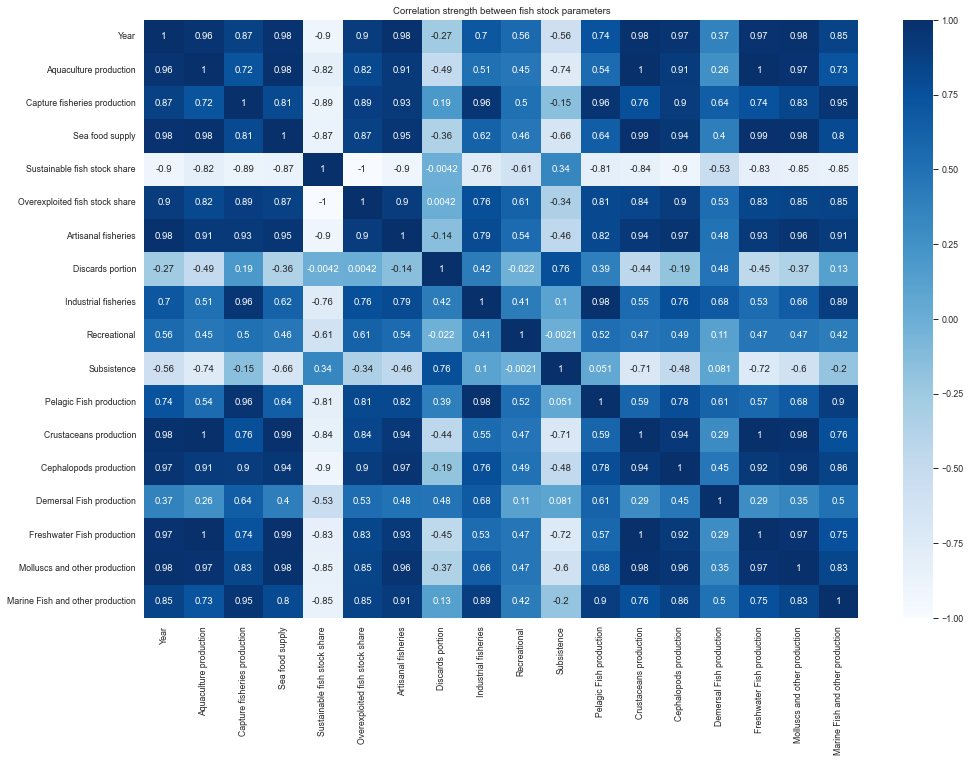

In [20]:
#Plotting a heatmap to see our correlation strength between our variables

dfc = df.copy()
dfm = df.corr()
sns.set_context("paper", rc={"axes.labelsize":5})
sns.heatmap(dfm, annot=True, cmap='Blues')
plt.title("Correlation strength between fish stock parameters")
sns.set(rc={'figure.figsize':(16,11)})

There is a strong correlation between year and fish stocks and we could means that the overfished/sustainable fish stock remains in a reasonable amount in these regions. Again the dataframe focuses on the sea water region globally so there is a stable amount of fish stock each region can produce so that is expected. One thing we can point out is that overexploited stock is rising with a positive correlation, while the sustainable source of fish is declining in the same rate as the overexploited stock.

<AxesSubplot: xlabel='Year', ylabel='Overexploited fish stock share'>

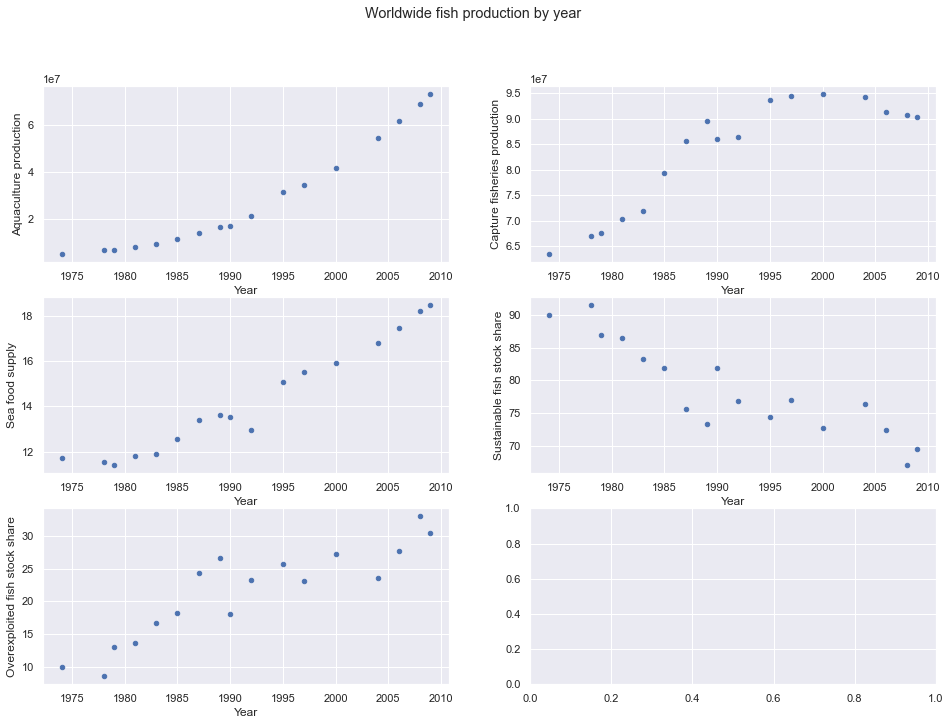

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(16, 11))
fig.suptitle('Worldwide fish production by year ')
df.plot(ax=axes[0, 0], kind='scatter', x='Year', y='Aquaculture production')
df.plot(ax=axes[0, 1], kind='scatter', x='Year', y='Capture fisheries production')
df.plot(ax=axes[1, 0], kind='scatter', x='Year', y='Sea food supply')
df.plot(ax=axes[1, 1], kind='scatter', x='Year', y='Sustainable fish stock share')
df.plot(ax=axes[2, 0], kind='scatter', x='Year', y='Overexploited fish stock share')

<AxesSubplot: xlabel='Year'>

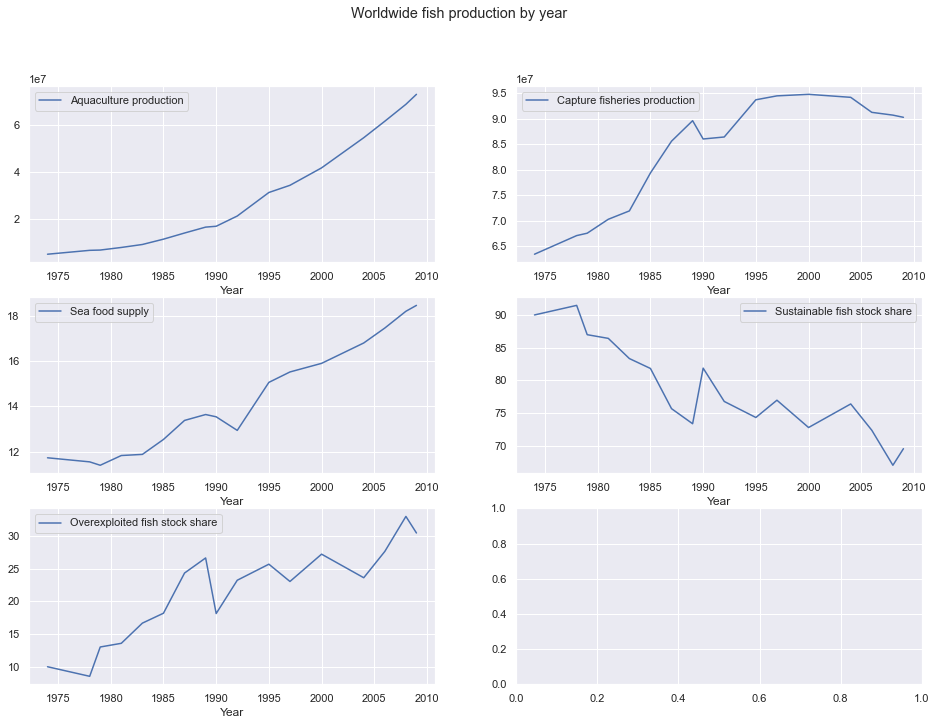

In [15]:
#It's better to view the trend as line diagrams
fig, axes = plt.subplots(3, 2, figsize=(16, 11))
fig.suptitle('Worldwide fish production by year ')
df.plot(ax=axes[0, 0], kind='line', x='Year', y='Aquaculture production')
df.plot(ax=axes[0, 1], kind='line', x='Year', y='Capture fisheries production')
df.plot(ax=axes[1, 0], kind='line', x='Year', y='Sea food supply')
df.plot(ax=axes[1, 1], kind='line', x='Year', y='Sustainable fish stock share')
df.plot(ax=axes[2, 0], kind='line', x='Year', y='Overexploited fish stock share')

These trend diagram shows the pattern of fish production rate by type over the decades, but I thnk it's better to take a closer look at sustainable and overfished stocks, since the number of records each year may vary.

In [16]:
# Checking how many unique data points contained in each column
df.nunique(axis=0)

Entity                               1
Code                                 1
Year                                17
Aquaculture production              17
Capture fisheries production        17
Sea food supply                     17
Sustainable fish stock share        17
Overexploited fish stock share      17
Artisanal fisheries                 17
Discards portion                    17
Industrial fisheries                17
Recreational                        17
Subsistence                         17
Pelagic Fish production             17
Crustaceans production              17
Cephalopods production              17
Demersal Fish production            17
Freshwater Fish production          17
Molluscs and other production       17
Marine Fish and other production    17
dtype: int64

This is fairly a consistent result, I also want to see the number of data occurances under each category

In [17]:
print(df.apply(lambda col: col.unique()))

Entity                                                                        [World]
Code                                                                       [OWID_WRL]
Year                                [1974, 1978, 1979, 1981, 1983, 1985, 1987, 198...
Aquaculture production              [4941524.0, 6593363.0, 6714748.0, 7818586.0, 9...
Capture fisheries production        [63470416.0, 67115747.0, 67583580.5, 70308777....
Sea food supply                     [11.73, 11.55, 11.4, 11.83, 11.88, 12.54, 13.3...
Sustainable fish stock share        [90.0, 91.46341463, 86.98224852, 86.41975309, ...
Overexploited fish stock share      [10.0, 8.53658537, 13.01775148, 13.58024691, 1...
Artisanal fisheries                 [13309012.0, 14360786.0, 14616134.0, 15279447....
Discards portion                    [11416434.0, 10872136.0, 10707877.0, 10984462....
Industrial fisheries                [56720856.0, 62623483.0, 60252600.0, 62459956....
Recreational                        [583018.0, 689377.

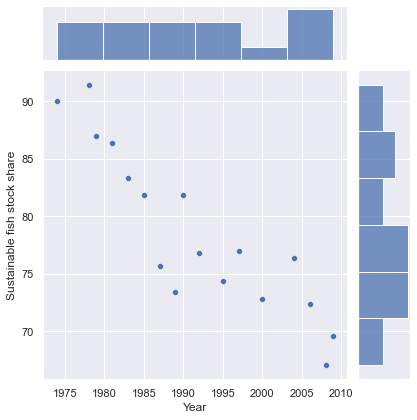

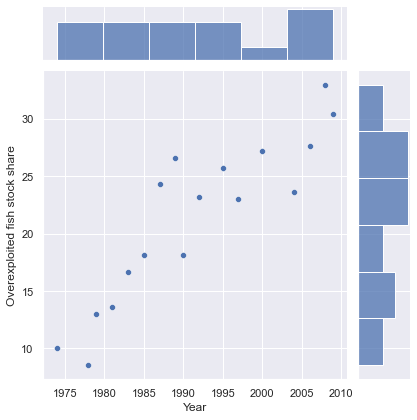

In [18]:
sns.set(rc={'figure.figsize':(14,10)})
sns.jointplot(x='Year',y='Sustainable fish stock share', kind='scatter', data=df)
sns.jointplot(x='Year',y='Overexploited fish stock share',kind='scatter', data=df)

In this chart we can see the decline rate of sustainable fish resource over the past decades. It's interesting to see that the sustainable sources are concentrated at a higher level than before in year past 2010, which could be an indicator that other countries are actively seeking sustainble methods in catching fish from the increasing awareness of global climate change.

Text(0, 0.5, 'Occurrences')

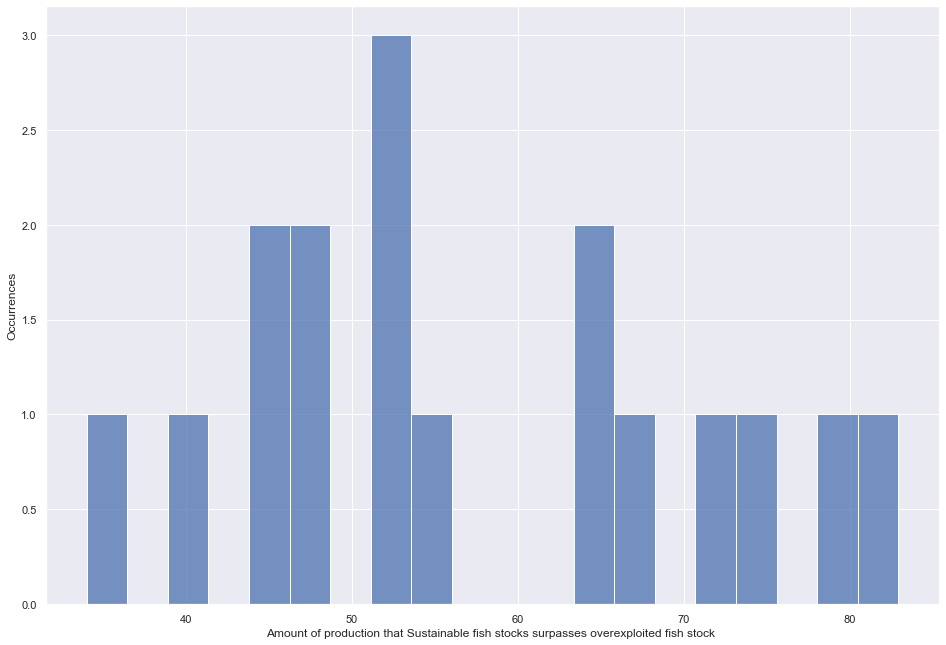

In [23]:
sns.histplot((df['Sustainable fish stock share'] - df['Overexploited fish stock share']), bins=20)
plt.xlabel("Amount of production that Sustainable fish stocks surpasses overexploited fish stock ")
plt.ylabel("Occurrences")

The difference between the share of sustainable stock and overexploited stock represents the amount of share each has in global fish stock production. We can see that the sustainable source remains predominantly large as the changes have a large count of positive values. Meaning the overexploited stock remains minimal when compared to the sustainable source.

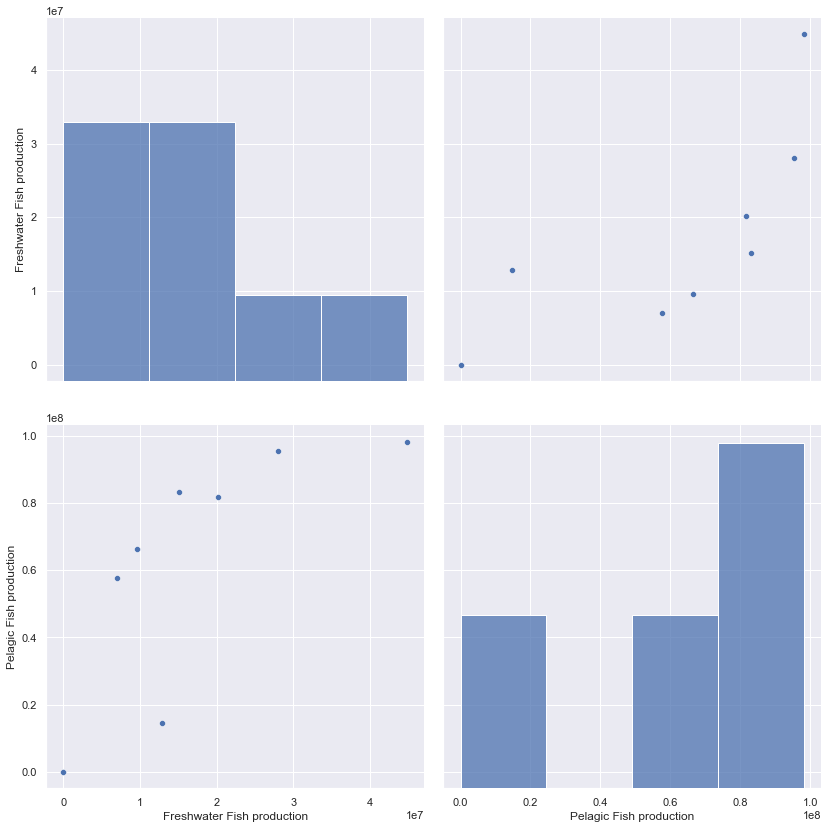

In [ ]:
sns.pairplot(df).fig.set_size_inches(13,13)

## Task 2: Data Analysis Pipeline

#### Load Dataframes

Datasets were already imported in Milestone 2

#### Wrangling/Joining Dataframes

In [ ]:
# Merging all our existing dataset all together

from functools import reduce

dfs = [aquaculture,capturedVsAquaculture, captured, seafoodConsumptionpercapita, sustainableFishStocks, globalFisheryBySector,seafoodProduction]

combined_df = reduce(lambda left,right: pd.merge(left,right,how='outer'), dfs)

# Export merged table
combined_df.to_csv('../data/processed/combined_nick.csv', index=False)

combined_df

,Entity,Code,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)","Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited,Artisanal (small-scale commercial),Discards,Industrial (large-scale commercial),Recreational,Subsistence,Commodity Balances - Livestock and Fish Primary Equivalent - Pelagic Fish - 2763 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Crustaceans - 2765 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Cephalopods - 2766 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Demersal Fish - 2762 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Freshwater Fish - 2761 - Production - 5510 - tonnes,"Commodity Balances - Livestock and Fish Primary Equivalent - Molluscs, Other - 2767 - Production - 5510 - tonnes","Commodity Balances - Livestock and Fish Primary Equivalent - Marine Fish, Other - 2764 - Production - 5510 - tonnes"
0,Afghanistan,AFG,1969,60.0,400.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460.0,NaN,NaN
1,Afghanistan,AFG,1970,60.0,400.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460.0,NaN,NaN
2,Afghanistan,AFG,1971,60.0,500.0,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.0,NaN,NaN
3,Afghanistan,AFG,1972,60.0,500.0,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.0,NaN,NaN
4,Afghanistan,AFG,1973,60.0,500.0,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16719,World,OWID_WRL,1955,NaN,NaN,NaN,NaN,NaN,9545554.0,8340179.0,18728089.0,313420.0,3012167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16720,World,OWID_WRL,1956,NaN,NaN,NaN,NaN,NaN,10303408.0,8692551.0,19902604.0,319333.0,3058523.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16721,World,OWID_WRL,1957,NaN,NaN,NaN,NaN,NaN,10425695.0,8998732.0,20030089.0,339291.0,3112506.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16722,World,OWID_WRL,1958,NaN,NaN,NaN,NaN,NaN,10172920.0,9255992.0,20520801.0,353633.0,3187292.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This combined dataset was the dataset I have used in the previous analysis

#### Cleaning Dataframes

In [ ]:
# Dropping the region code column 
cleaned_dfc = combined_df.copy().dropna()
cleaned_dfc = cleaned_dfc.copy().drop(['Code','Recreational','Subsistence'], axis=1)
cleaned_dfc

,Entity,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)","Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited,Artisanal (small-scale commercial),Discards,Industrial (large-scale commercial),Commodity Balances - Livestock and Fish Primary Equivalent - Pelagic Fish - 2763 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Crustaceans - 2765 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Cephalopods - 2766 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Demersal Fish - 2762 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Freshwater Fish - 2761 - Production - 5510 - tonnes,"Commodity Balances - Livestock and Fish Primary Equivalent - Molluscs, Other - 2767 - Production - 5510 - tonnes","Commodity Balances - Livestock and Fish Primary Equivalent - Marine Fish, Other - 2764 - Production - 5510 - tonnes"
11459,World,1974,4.941524e+06,6.347042e+07,11.73,90.000000,10.000000,13309012.0,11416434.0,56720856.0,24284946.0,2445572.0,1149853.0,20306693.0,7052049.0,2885060.0,6489120.0
11463,World,1978,6.593363e+06,6.711575e+07,11.55,91.463415,8.536585,14360786.0,10872136.0,62623483.0,28363175.0,2920449.0,1366216.0,18129858.0,7299159.0,3755290.0,7197560.0
11464,World,1979,6.714748e+06,6.758358e+07,11.40,86.982249,13.017751,14616134.0,10707877.0,60252600.0,29107367.0,3035709.0,1520458.0,18016274.0,7546690.0,3732677.0,6813622.0
11466,World,1981,7.818586e+06,7.030878e+07,11.83,86.419753,13.580247,15279447.0,10984462.0,62459956.0,30203706.0,3188812.0,1376507.0,18472773.0,8576233.0,4351292.0,7464466.0
11468,World,1983,9.089265e+06,7.194627e+07,11.88,83.333333,16.666667,15300068.0,12388473.0,65689361.0,30993337.0,3227566.0,1698033.0,18692863.0,9634243.0,4706299.0,7108501.0
11470,World,1985,1.135435e+07,7.938011e+07,12.54,81.818182,18.181818,16380243.0,14706334.0,73506569.0,35008279.0,3712331.0,1810177.0,20476810.0,11149463.0,5290458.0,7586319.0
11472,World,1987,1.397150e+07,8.559538e+07,13.38,75.675676,24.324324,17449809.0,15669889.0,79755589.0,36713357.0,4253232.0,2306464.0,22248731.0,12944688.0,6399597.0,8656623.0
11474,World,1989,1.648635e+07,8.960318e+07,13.64,73.369565,26.630435,17620239.0,16962727.0,84135075.0,40633254.0,4500018.0,2642398.0,21592866.0,14411489.0,6531953.0,8937721.0
11475,World,1990,1.685046e+07,8.602430e+07,13.54,81.868132,18.131868,17734811.0,16698879.0,80593708.0,38500691.0,4597090.0,2364220.0,20400515.0,15084741.0,6719747.0,8866408.0
11477,World,1992,2.121149e+07,8.641559e+07,12.94,76.777251,23.222749,18417117.0,15717869.0,81793283.0,38396607.0,5104946.0,2766780.0,19775057.0,15856044.0,7878597.0,9248784.0


#### Processing Dataframes

In [ ]:
# Renaming the columns as many title are too complicated to read , mostly the fish stock parameters

df = cleaned_dfc.rename(columns={'Aquaculture production (metric tons)': 'Aquaculture production', 'Capture fisheries production (metric tons)': 'Capture fisheries production'})
df = df.rename(columns={'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)': 'Sea food supply', 'Share of fish stocks within biologically sustainable levels (FAO, 2020)': 'Sustainable fish stock share'})
df = df.rename(columns={'Share of fish stocks that are overexploited': 'Overexploited fish stock share', 'Artisanal (small-scale commercial)': 'Artisanal fisheries'})
df = df.rename(columns={'Discards': 'Discards portion', 'Commodity Balances - Livestock and Fish Primary Equivalent - Pelagic Fish - 2763 - Production - 5510 - tonnes': 'Pelagic Fish production'})
df = df.rename(columns={'Commodity Balances - Livestock and Fish Primary Equivalent - Crustaceans - 2765 - Production - 5510 - tonnes': 'Crustaceans production', 'Commodity Balances - Livestock and Fish Primary Equivalent - Cephalopods - 2766 - Production - 5510 - tonnes': 'Cephalopods production'})
df = df.rename(columns={'Commodity Balances - Livestock and Fish Primary Equivalent - Demersal Fish - 2762 - Production - 5510 - tonnes': 'Demersal Fish production', 'Commodity Balances - Livestock and Fish Primary Equivalent - Freshwater Fish - 2761 - Production - 5510 - tonnes': 'Freshwater Fish production'})
df = df.rename(columns={'Commodity Balances - Livestock and Fish Primary Equivalent - Molluscs, Other - 2767 - Production - 5510 - tonnes': 'Molluscs and other production', 'Commodity Balances - Livestock and Fish Primary Equivalent - Marine Fish, Other - 2764 - Production - 5510 - tonnes': 'Marine Fish and other production'})
df = df.rename(columns={'Industrial (large-scale commercial)':'Industrial fisheries'})
df

,Entity,Year,Aquaculture production,Capture fisheries production,Sea food supply,Sustainable fish stock share,Overexploited fish stock share,Artisanal fisheries,Discards portion,Industrial fisheries,Pelagic Fish production,Crustaceans production,Cephalopods production,Demersal Fish production,Freshwater Fish production,Molluscs and other production,Marine Fish and other production
11459,World,1974,4.941524e+06,6.347042e+07,11.73,90.000000,10.000000,13309012.0,11416434.0,56720856.0,24284946.0,2445572.0,1149853.0,20306693.0,7052049.0,2885060.0,6489120.0
11463,World,1978,6.593363e+06,6.711575e+07,11.55,91.463415,8.536585,14360786.0,10872136.0,62623483.0,28363175.0,2920449.0,1366216.0,18129858.0,7299159.0,3755290.0,7197560.0
11464,World,1979,6.714748e+06,6.758358e+07,11.40,86.982249,13.017751,14616134.0,10707877.0,60252600.0,29107367.0,3035709.0,1520458.0,18016274.0,7546690.0,3732677.0,6813622.0
11466,World,1981,7.818586e+06,7.030878e+07,11.83,86.419753,13.580247,15279447.0,10984462.0,62459956.0,30203706.0,3188812.0,1376507.0,18472773.0,8576233.0,4351292.0,7464466.0
11468,World,1983,9.089265e+06,7.194627e+07,11.88,83.333333,16.666667,15300068.0,12388473.0,65689361.0,30993337.0,3227566.0,1698033.0,18692863.0,9634243.0,4706299.0,7108501.0
11470,World,1985,1.135435e+07,7.938011e+07,12.54,81.818182,18.181818,16380243.0,14706334.0,73506569.0,35008279.0,3712331.0,1810177.0,20476810.0,11149463.0,5290458.0,7586319.0
11472,World,1987,1.397150e+07,8.559538e+07,13.38,75.675676,24.324324,17449809.0,15669889.0,79755589.0,36713357.0,4253232.0,2306464.0,22248731.0,12944688.0,6399597.0,8656623.0
11474,World,1989,1.648635e+07,8.960318e+07,13.64,73.369565,26.630435,17620239.0,16962727.0,84135075.0,40633254.0,4500018.0,2642398.0,21592866.0,14411489.0,6531953.0,8937721.0
11475,World,1990,1.685046e+07,8.602430e+07,13.54,81.868132,18.131868,17734811.0,16698879.0,80593708.0,38500691.0,4597090.0,2364220.0,20400515.0,15084741.0,6719747.0,8866408.0
11477,World,1992,2.121149e+07,8.641559e+07,12.94,76.777251,23.222749,18417117.0,15717869.0,81793283.0,38396607.0,5104946.0,2766780.0,19775057.0,15856044.0,7878597.0,9248784.0


In [ ]:
# Order dataframe by year
df = df.sort_values(by=['Year'])
df

,Entity,Year,Aquaculture production,Capture fisheries production,Sea food supply,Sustainable fish stock share,Overexploited fish stock share,Artisanal fisheries,Discards portion,Industrial fisheries,Pelagic Fish production,Crustaceans production,Cephalopods production,Demersal Fish production,Freshwater Fish production,Molluscs and other production,Marine Fish and other production
11459,World,1974,4.941524e+06,6.347042e+07,11.73,90.000000,10.000000,13309012.0,11416434.0,56720856.0,24284946.0,2445572.0,1149853.0,20306693.0,7052049.0,2885060.0,6489120.0
11463,World,1978,6.593363e+06,6.711575e+07,11.55,91.463415,8.536585,14360786.0,10872136.0,62623483.0,28363175.0,2920449.0,1366216.0,18129858.0,7299159.0,3755290.0,7197560.0
11464,World,1979,6.714748e+06,6.758358e+07,11.40,86.982249,13.017751,14616134.0,10707877.0,60252600.0,29107367.0,3035709.0,1520458.0,18016274.0,7546690.0,3732677.0,6813622.0
11466,World,1981,7.818586e+06,7.030878e+07,11.83,86.419753,13.580247,15279447.0,10984462.0,62459956.0,30203706.0,3188812.0,1376507.0,18472773.0,8576233.0,4351292.0,7464466.0
11468,World,1983,9.089265e+06,7.194627e+07,11.88,83.333333,16.666667,15300068.0,12388473.0,65689361.0,30993337.0,3227566.0,1698033.0,18692863.0,9634243.0,4706299.0,7108501.0
11470,World,1985,1.135435e+07,7.938011e+07,12.54,81.818182,18.181818,16380243.0,14706334.0,73506569.0,35008279.0,3712331.0,1810177.0,20476810.0,11149463.0,5290458.0,7586319.0
11472,World,1987,1.397150e+07,8.559538e+07,13.38,75.675676,24.324324,17449809.0,15669889.0,79755589.0,36713357.0,4253232.0,2306464.0,22248731.0,12944688.0,6399597.0,8656623.0
11474,World,1989,1.648635e+07,8.960318e+07,13.64,73.369565,26.630435,17620239.0,16962727.0,84135075.0,40633254.0,4500018.0,2642398.0,21592866.0,14411489.0,6531953.0,8937721.0
11475,World,1990,1.685046e+07,8.602430e+07,13.54,81.868132,18.131868,17734811.0,16698879.0,80593708.0,38500691.0,4597090.0,2364220.0,20400515.0,15084741.0,6719747.0,8866408.0
11477,World,1992,2.121149e+07,8.641559e+07,12.94,76.777251,23.222749,18417117.0,15717869.0,81793283.0,38396607.0,5104946.0,2766780.0,19775057.0,15856044.0,7878597.0,9248784.0


In [ ]:
# Merge different catagories of fish into two main types, Pelagic fish and freshwater fish
df_merged = df.copy()

df_merged['Pelagic Fish production'] = df_merged['Pelagic Fish production']+ df_merged['Crustaceans production']+ df_merged['Cephalopods production'] + df_merged['Demersal Fish production']+ df_merged['Molluscs and other production'] + df_merged['Marine Fish and other production'] 
df_merged = df_merged.drop(['Crustaceans production', 'Cephalopods production','Demersal Fish production', 'Molluscs and other production', 'Marine Fish and other production'], axis=1)
df_merged

,Entity,Year,Aquaculture production,Capture fisheries production,Sea food supply,Sustainable fish stock share,Overexploited fish stock share,Artisanal fisheries,Discards portion,Industrial fisheries,Pelagic Fish production,Freshwater Fish production
11459,World,1974,4.941524e+06,6.347042e+07,11.73,90.000000,10.000000,13309012.0,11416434.0,56720856.0,57561244.0,7052049.0
11463,World,1978,6.593363e+06,6.711575e+07,11.55,91.463415,8.536585,14360786.0,10872136.0,62623483.0,61732548.0,7299159.0
11464,World,1979,6.714748e+06,6.758358e+07,11.40,86.982249,13.017751,14616134.0,10707877.0,60252600.0,62226107.0,7546690.0
11466,World,1981,7.818586e+06,7.030878e+07,11.83,86.419753,13.580247,15279447.0,10984462.0,62459956.0,65057556.0,8576233.0
11468,World,1983,9.089265e+06,7.194627e+07,11.88,83.333333,16.666667,15300068.0,12388473.0,65689361.0,66426599.0,9634243.0
11470,World,1985,1.135435e+07,7.938011e+07,12.54,81.818182,18.181818,16380243.0,14706334.0,73506569.0,73884374.0,11149463.0
11472,World,1987,1.397150e+07,8.559538e+07,13.38,75.675676,24.324324,17449809.0,15669889.0,79755589.0,80578004.0,12944688.0
11474,World,1989,1.648635e+07,8.960318e+07,13.64,73.369565,26.630435,17620239.0,16962727.0,84135075.0,84838210.0,14411489.0
11475,World,1990,1.685046e+07,8.602430e+07,13.54,81.868132,18.131868,17734811.0,16698879.0,80593708.0,81448671.0,15084741.0
11477,World,1992,2.121149e+07,8.641559e+07,12.94,76.777251,23.222749,18417117.0,15717869.0,81793283.0,83170771.0,15856044.0


## Task 3: Method Chaining

In [ ]:
import project_functions_nick as pn

In [ ]:
cleaned_dataset = pn.load_and_process("../data/processed/combined_nick.csv")
cleaned_dataset

# The result:

,Entity,Year,Aquaculture production,Capture fisheries production,Sea food supply,Sustainable fish stock share,Overexploited fish stock share,Artisanal fisheries,Discards portion,Industrial fisheries,Pelagic Fish production,Freshwater Fish production
11459,World,1974,4.941524e+06,6.347042e+07,11.73,90.000000,10.000000,13309012.0,11416434.0,56720856.0,57561244.0,7052049.0
11463,World,1978,6.593363e+06,6.711575e+07,11.55,91.463415,8.536585,14360786.0,10872136.0,62623483.0,61732548.0,7299159.0
11464,World,1979,6.714748e+06,6.758358e+07,11.40,86.982249,13.017751,14616134.0,10707877.0,60252600.0,62226107.0,7546690.0
11466,World,1981,7.818586e+06,7.030878e+07,11.83,86.419753,13.580247,15279447.0,10984462.0,62459956.0,65057556.0,8576233.0
11468,World,1983,9.089265e+06,7.194627e+07,11.88,83.333333,16.666667,15300068.0,12388473.0,65689361.0,66426599.0,9634243.0
11470,World,1985,1.135435e+07,7.938011e+07,12.54,81.818182,18.181818,16380243.0,14706334.0,73506569.0,73884374.0,11149463.0
11472,World,1987,1.397150e+07,8.559538e+07,13.38,75.675676,24.324324,17449809.0,15669889.0,79755589.0,80578004.0,12944688.0
11474,World,1989,1.648635e+07,8.960318e+07,13.64,73.369565,26.630435,17620239.0,16962727.0,84135075.0,84838210.0,14411489.0
11475,World,1990,1.685046e+07,8.602430e+07,13.54,81.868132,18.131868,17734811.0,16698879.0,80593708.0,81448671.0,15084741.0
11477,World,1992,2.121149e+07,8.641559e+07,12.94,76.777251,23.222749,18417117.0,15717869.0,81793283.0,83170771.0,15856044.0


In [ ]:
cleaned_dataset.to_csv('../data/processed/processed_nick.csv', index=False)

## Task 4: Data Analysis


In [ ]:
import project_functions_nick as pn 
data = pn.load_and_process("../data/processed/combined_nick.csv")
data

,Entity,Year,Aquaculture production,Capture fisheries production,Sea food supply,Sustainable fish stock share,Overexploited fish stock share,Artisanal fisheries,Discards portion,Industrial fisheries,Pelagic Fish production,Freshwater Fish production
11459,World,1974,4.941524e+06,6.347042e+07,11.73,90.000000,10.000000,13309012.0,11416434.0,56720856.0,57561244.0,7052049.0
11463,World,1978,6.593363e+06,6.711575e+07,11.55,91.463415,8.536585,14360786.0,10872136.0,62623483.0,61732548.0,7299159.0
11464,World,1979,6.714748e+06,6.758358e+07,11.40,86.982249,13.017751,14616134.0,10707877.0,60252600.0,62226107.0,7546690.0
11466,World,1981,7.818586e+06,7.030878e+07,11.83,86.419753,13.580247,15279447.0,10984462.0,62459956.0,65057556.0,8576233.0
11468,World,1983,9.089265e+06,7.194627e+07,11.88,83.333333,16.666667,15300068.0,12388473.0,65689361.0,66426599.0,9634243.0
11470,World,1985,1.135435e+07,7.938011e+07,12.54,81.818182,18.181818,16380243.0,14706334.0,73506569.0,73884374.0,11149463.0
11472,World,1987,1.397150e+07,8.559538e+07,13.38,75.675676,24.324324,17449809.0,15669889.0,79755589.0,80578004.0,12944688.0
11474,World,1989,1.648635e+07,8.960318e+07,13.64,73.369565,26.630435,17620239.0,16962727.0,84135075.0,84838210.0,14411489.0
11475,World,1990,1.685046e+07,8.602430e+07,13.54,81.868132,18.131868,17734811.0,16698879.0,80593708.0,81448671.0,15084741.0
11477,World,1992,2.121149e+07,8.641559e+07,12.94,76.777251,23.222749,18417117.0,15717869.0,81793283.0,83170771.0,15856044.0


My primary interest targets on how aquaculture production(i.e the sustainable fish stock in general has whether helped alleviate the shortage of global fish stock cause by overfishing. Here we will take our focus on the two primary columns for the analysis, _Sustainable fish stock share_ and _Overexploited fish stock share_. It is important to keep in mind that the two columns focus on sea regions rather than countries, so the data will not be as rich when compared to countries.

In [ ]:
data_preview = data.copy().describe().T
data_preview

,count,mean,std,min,25%,50%,75%,max
Year,17.0,1.991588e+03,1.106266e+01,1.974000e+03,1.983000e+03,1.990000e+03,2.000000e+03,2.009000e+03
Aquaculture production,17.0,2.825243e+07,2.338557e+07,4.941524e+06,9.089265e+06,1.685046e+07,4.172457e+07,7.304526e+07
Capture fisheries production,17.0,8.333787e+07,1.097147e+07,6.347042e+07,7.194627e+07,8.641559e+07,9.123777e+07,9.476386e+07
Sea food supply,17.0,1.422529e+01,2.431869e+00,1.140000e+01,1.188000e+01,1.354000e+01,1.590000e+01,1.846000e+01
Sustainable fish stock share,17.0,7.865470e+01,7.175134e+00,6.702128e+01,7.336957e+01,7.677725e+01,8.333333e+01,9.146341e+01
Overexploited fish stock share,17.0,2.134530e+01,7.175134e+00,8.536585e+00,1.666667e+01,2.322275e+01,2.663043e+01,3.297872e+01
Artisanal fisheries,17.0,1.798265e+07,2.758423e+06,1.330901e+07,1.530007e+07,1.773481e+07,2.040185e+07,2.182862e+07
Discards portion,17.0,1.268801e+07,2.627330e+06,9.369530e+06,1.070788e+07,1.198613e+07,1.470633e+07,1.696273e+07
Industrial fisheries,17.0,7.575194e+07,1.045688e+07,5.672086e+07,6.568936e+07,7.848082e+07,8.413508e+07,8.820520e+07
Pelagic Fish production,17.0,8.176257e+07,1.464615e+07,5.756124e+07,6.642660e+07,8.317077e+07,9.546341e+07,9.822139e+07


Here we can tell that the mean Sustainable fish stock share has surpasses the Overexploited fish stock share and takes greater portion in gthe overall fishery production. The main fishery method is predominantly industrial, and Artisanal fisheries only takes 1/5 portion when compared to industrial fishing, which isn't surprising as many countries have developed advanced fishing machinery and equipments. The problem is whether such industrialized method has helped to reduced the amount of overfishing?

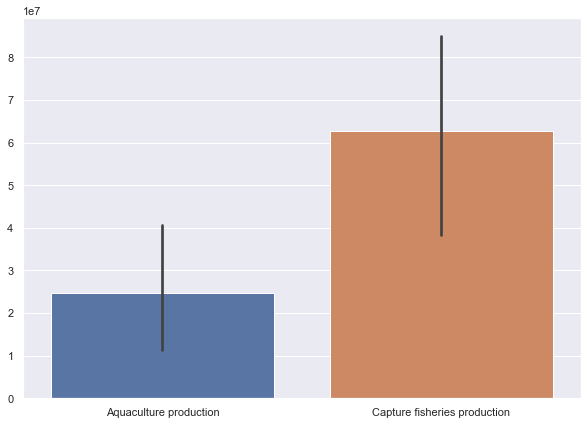

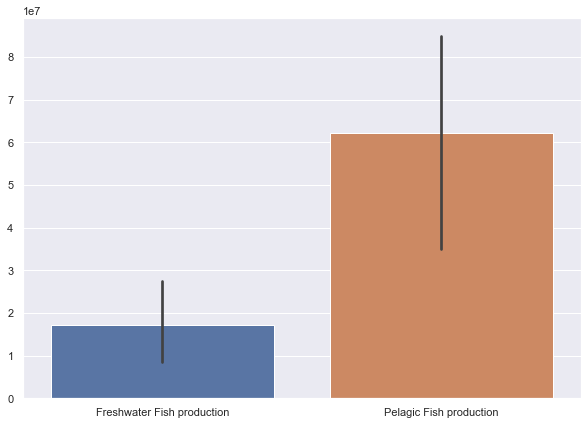

In [ ]:
import matplotlib.pyplot as plt

df = data.copy().describe()
df = df.filter(items=['Aquaculture production', 'Capture fisheries production'])

fig, ax = plt.subplots(figsize=(10, 7))
dfg= sns.barplot(data=df, ax=ax)

df = data.copy().describe()
df = df.filter(items=['Freshwater Fish production', 'Pelagic Fish production'])

fig, ax = plt.subplots(figsize=(10, 7))
dfg= sns.barplot(data=df, ax=ax)

These figures are two bar charts of sustainable/overfished production and freshwater/pelagic fish production. Noticed that sustainable method i.e aquaculture produces only freshwater fish, hence we can easily see the correlation between captured fish and pelagic fish production as pelagic fishes are mostly wild and cannot be farmed.

Here we can see that the aquaculture production has a slightly higher portion than the one in capture fisheries production, roughtly about 15% higher, which may indicate that Aquaculture is still the main preference for these region to produce fish. Bare in mind that the Aquaculture is part of the sustainable method that reduces the impact of climate change. However, the capture fisheries still remains large, I assumed that this change of production only happens recently by the awareness of the climate change, or perhaps it may caused by many fishery production has not made a proper transition to aquaculture, or even many fish stock avaliable is not viable for aquaculture.

### Conclusion

It's possible from the graphs to see that there is a firm correlation between aquaculture production and freshwater fish prodution, but there isn't a clear relationship on which aquaculture reduces the impact of overfishing, in fact, the mean rate of overexploited fish stock climbs over the past decades. The dataset could be refined as most the values for countries are missing with null values, but from the data it can be seen that overexploited fish production had a major fluctuation between 1986 to 1990. The product records at 2002 was rare and has only one datapoint, resulting very small collection of datapoints hence skewing the results. Overall, the declining trend of sustainable fishing method can be an indicator that aquaculture isn't the only factor that helps to slow down the rate of overfishing, the result of reducing the impact of overfishing maybe cause by human factors and the interest of customer who made decision on the source of fish that they tend to buy.

In [ ]:
data

,Entity,Year,Aquaculture production,Capture fisheries production,Sea food supply,Sustainable fish stock share,Overexploited fish stock share,Artisanal fisheries,Discards portion,Industrial fisheries,Pelagic Fish production,Freshwater Fish production
11459,World,1974,4.941524e+06,6.347042e+07,11.73,90.000000,10.000000,13309012.0,11416434.0,56720856.0,57561244.0,7052049.0
11463,World,1978,6.593363e+06,6.711575e+07,11.55,91.463415,8.536585,14360786.0,10872136.0,62623483.0,61732548.0,7299159.0
11464,World,1979,6.714748e+06,6.758358e+07,11.40,86.982249,13.017751,14616134.0,10707877.0,60252600.0,62226107.0,7546690.0
11466,World,1981,7.818586e+06,7.030878e+07,11.83,86.419753,13.580247,15279447.0,10984462.0,62459956.0,65057556.0,8576233.0
11468,World,1983,9.089265e+06,7.194627e+07,11.88,83.333333,16.666667,15300068.0,12388473.0,65689361.0,66426599.0,9634243.0
11470,World,1985,1.135435e+07,7.938011e+07,12.54,81.818182,18.181818,16380243.0,14706334.0,73506569.0,73884374.0,11149463.0
11472,World,1987,1.397150e+07,8.559538e+07,13.38,75.675676,24.324324,17449809.0,15669889.0,79755589.0,80578004.0,12944688.0
11474,World,1989,1.648635e+07,8.960318e+07,13.64,73.369565,26.630435,17620239.0,16962727.0,84135075.0,84838210.0,14411489.0
11475,World,1990,1.685046e+07,8.602430e+07,13.54,81.868132,18.131868,17734811.0,16698879.0,80593708.0,81448671.0,15084741.0
11477,World,1992,2.121149e+07,8.641559e+07,12.94,76.777251,23.222749,18417117.0,15717869.0,81793283.0,83170771.0,15856044.0


In [ ]:
data.to_csv('../data/processed/processed_nick.csv', index=False)